# The Sparks Foundation

## Graduate Rotational Internship Program(GRIP) APR2021-batch

## Task 2- From the given ‘Iris’ dataset, predict the optimum number of clusters 
## and represent it visually. 

### By: P.Rama Krishna

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing And Reading The Dataset

In [2]:
#Loading the dataset
data=pd.read_csv(r"C:\Users\prama\Desktop\Spark intern files\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking the shape of the data
data.shape

(150, 6)

In [5]:
#Finding the data types and summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Finding the statastical description of the given data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#Checking for missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#Dropping the unwanted columns
data=data.drop(columns=['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


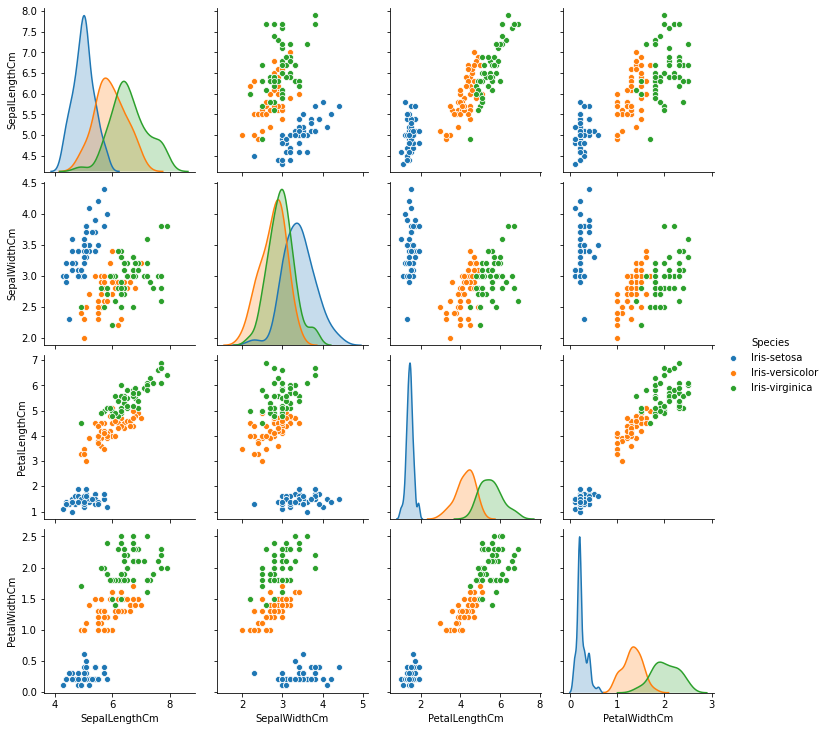

In [10]:
#Try to observe the relationship between the data
sns.pairplot(data,hue='Species')

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
#Selecting x- label and y label from the given data
x=data.drop(columns=['Species'])

In [19]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


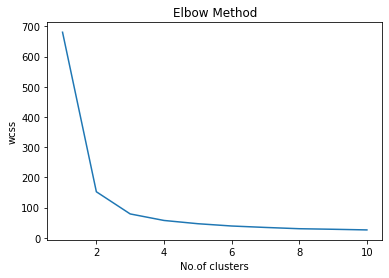

In [22]:
# Finding the optimum number of clusters for k-means classification
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(x)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No.of clusters')
plt.ylabel('wcss')
plt.show()

### From this we choose the number of clusters as ** '3**'.

In [24]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [26]:
#Normalising the data
scalar=StandardScaler()
x=scalar.fit_transform(x)
kmeans=KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [31]:
a= kmeans.predict(x)

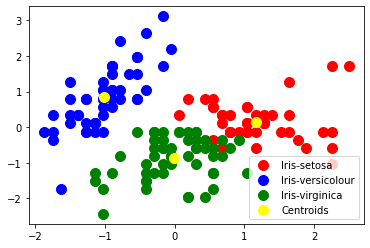

In [32]:
# Visualising the clusters - On the first two columns
plt.scatter(x[a==0,0],x[a==0,1],
           s=100,c='red',label='Iris-setosa')
plt.scatter(x[a==1,0],x[a==1,1],
           s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[a==2,0],x[a==2,1],
           s=100,c='green',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c='yellow',label='Centroids')

plt.legend()

###This concludes the K-Means Workshop. 